In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
nb_classes = 10

In [3]:
# load the minst data set (handwritgint regognition)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


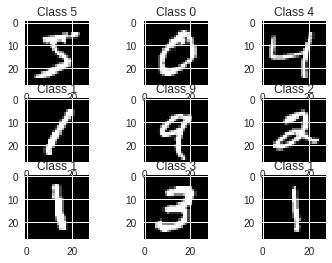

In [5]:
plt.Figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title('Class {}'.format(y_train[i]))

In [6]:
# We cannot pass into 2-D data into the network so we rshape it to be a long vector
X_train = X_train.reshape(60000, 784)# single vector
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255# normalize
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
# Use a prebult one-hot-encoder
Y_train = np_utils.to_categorical(y_train, nb_classes)#one hot encode
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [9]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          show_accuracy=True, verbose=1,
          validation_data=(X_test, Y_test))

/home/tboudreaux/anaconda/envs/ML3/lib/python3.6/site-packages/keras/models.py:654: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 24s - loss: 0.2562 - val_loss: 0.1128

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score) 

Test score: 0.0801543312412


In [12]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9760/10000 [============================>.] - ETA: 0s 

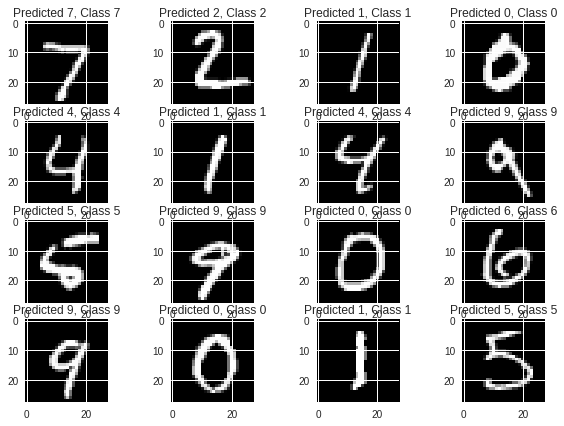

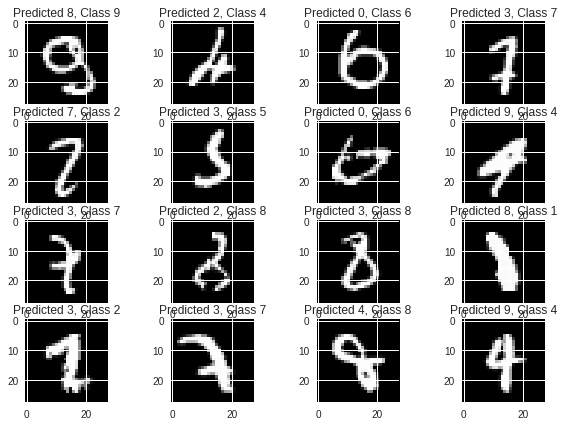

In [13]:
plt.figure(figsize=(10, 7))
for i, correct in enumerate(correct_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.savefig('Correct_mnist.pdf', dpi=350, bbox_inches='tight')  
plt.figure(figsize=(10, 7))
for i, incorrect in enumerate(incorrect_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.savefig('Incorrect_mnist.pdf', dpi=350, bbox_inches='tight')